In [1]:
from scripts.scaffoldfinder import ScaffoldFinder

from rdkit import Chem
from rdkit.Chem import AllChem, Draw

# very simple molecules as an example.
mols = [Chem.MolFromSmiles(smi) for smi in [
    "CCC(O)CCCCNCO",
    "CCCc1ccccc1CNCO",
    "CC1CCCCC1NCO",
    "C1CCC2CCC1NC2O",
    ]
]

# a single pair of very simple decorations as an example.
decorations = [tuple(Chem.MolFromSmiles(f) for f in reference_decoration_tuple) for reference_decoration_tuple in [('*C', "*O"),]]

SF = ScaffoldFinder(molecules=mols, reference_decorations=decorations)
SF.process_molecules()

,ID,molecule,scaffold,scaffold_success,reference_ID,indices_scaffold,indices_decorations
0,Mol_0,CCC(O)CCCCNCO,*CC(*)CCCCNCO,1.0,db_0,"{1, 2, 4, 5, 6, 7, 8, 9, 10}","{0, 3}"
1,Mol_1,CCCc1ccccc1CNCO,*CCc1ccccc1CNC*,1.0,db_0,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}","{0, 12}"
2,Mol_2,CC1CCCCC1NCO,*CNC1CCCCC1*,1.0,db_0,"{1, 2, 3, 4, 5, 6, 7, 8}","{0, 9}"
3,Mol_3,OC1NC2CCCC1CC2,OC1NC2CCCC1CC2,0.5,db_0,[],"[9, 8]"


In [2]:
# self identification test for the reference molecules used for the case-studies.

def grab_seeds(ligand):
    if ligand == 'lre001':
        reference_mols = ["ClC1=NC(N)=NC(N(CC2=CC=CS2)C3CC3)=C1"] # LRE001
        reference_decorations = [("ClC1=NC(N)=NC(*)=C1", "*C2=CC=CS2"),]
        reference_scaffolds = [ '*CN(*)C1CC1' ]
    if ligand == 'aha006':
        reference_mols = ['O=S1(=O)N(Cc2ccccc2)C(COc2ccccc2)C(O)C(O)C(COc2ccccc2)N1Cc1ccccc1'] # aha006
        reference_decorations = [("C1=CC=C(O*)C=C1", "C1=CC=C(O*)C=C1", "C1=CC=C(*)C=C1", "C1=CC=C(*)C=C1"),]
        reference_scaffolds = [ '*CC1C(O)C(O)C(C*)N(C*)S(=O)(=O)N1C*' ]
    if ligand == 'sr3737':
        reference_mols = ['COc1cc(NC(=O)c2cccc(-n3ncc4cc(Nc5ccccc5F)ccc43)c2)cc(OC)c1OC'] # sr3737
        reference_decorations = [("COC1=CC(NC(C2=CC=CC(*)=C2)=O)=CC(OC)=C1OC", "N(*)C1=C(F)C=CC=C1"),]
        reference_scaffolds = [ "[*]n1c2ccc([*])cc2cn1" ]
    if ligand == 'pim447':
        reference_mols = ['CC1CC(N)CC(c2ccncc2NC(=O)c2ccc(F)c(-c3c(F)cccc3F)n2)C1'] #pim447
        reference_decorations = [('*c1cnccc1C1CC(C)CC(N)C1', '*c1c(F)cccc1F'),]
        reference_scaffolds = [ "O=C(N[*])c1nc([*])c(F)cc1" ]
    return reference_mols, reference_decorations, reference_scaffolds

In [3]:
ligand = 'pim447'

reference_mols, reference_decorations, reference_scaffolds = grab_seeds(ligand)

mols = [Chem.MolFromSmiles(smi) for smi in reference_mols]
decorations = [tuple(Chem.MolFromSmiles(f) for f in reference_decoration_tuple) for reference_decoration_tuple in reference_decorations]

SF = ScaffoldFinder(molecules=mols, reference_decorations=decorations)
# we expect a scaffold_success of 1.0. The returned scaffold can then be compared to the expected results (reference_scaffold.)
results = SF.process_molecules()
results.head()

,ID,molecule,scaffold,scaffold_success,reference_ID,indices_scaffold,indices_decorations
0,Mol_0,CC1CC(N)CC(c2ccncc2NC(=O)c2ccc(F)c(-c3c(F)cccc...,*NC(=O)c1ccc(F)c(*)n1,1.0,db_0,"{13, 14, 15, 16, 17, 18, 19, 20, 21, 30}","{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 22,..."


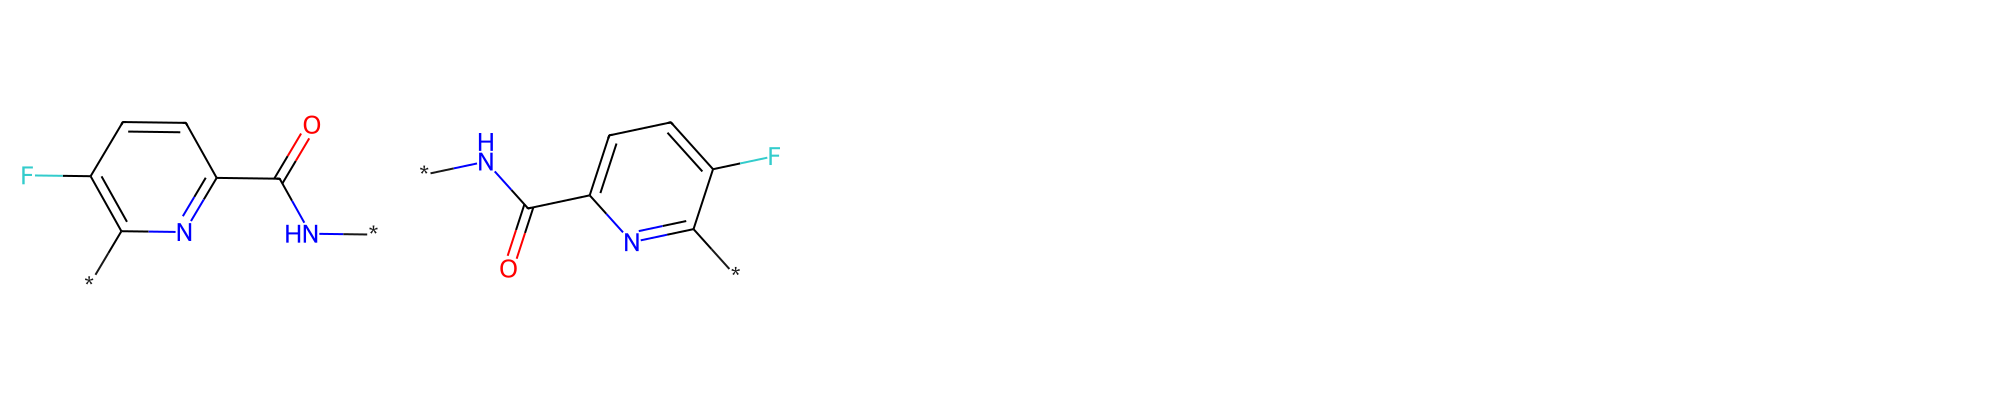

In [4]:
# looks good :)
Draw.MolsToGridImage([Chem.MolFromSmiles(reference_scaffolds[0]), Chem.MolFromSmiles(results.scaffold[0])], molsPerRow=5, subImgSize=(400,400))

For illustration purposed, we have provided a semi-curated list of ligands for PIM1 using the ChEMBL API.

In [17]:
import pandas as pd

DF = pd.read_csv(f"data/PIM1_CHEMBL2147_ligands.csv")
MOLS = [Chem.MolFromSmiles(SMI) for SMI in DF.canonical_smiles]
NAMES = DF.molecule_chembl_id.to_list()
# name the molecules ourselves so the output is consistent with out DF.
[MOL.SetProp("_Name", NAME) for MOL, NAME in zip(MOLS, NAMES)]

# PIM1 has an interesting number of ligands for which the allowance parameter is useful.
# to demonstrate this, lets run scaffoldfinder with an allowance of 0.9 on these public ligands.
SF = ScaffoldFinder(molecules=MOLS, allowance=0.9, reference_decorations=decorations, name_mols=False)

results = SF.process_molecules()
results.head()

,ID,molecule,scaffold,scaffold_success,reference_ID,indices_scaffold,indices_decorations
0,CHEMBL3684942,Brc1c(Br)c(Br)c2[nH]c(N3C=NC4CCCCC43)nc2c1Br,Brc1c(Br)c(Br)c2[nH]c(N3C=NC4CCCCC43)nc2c1Br,0.0,db_0,[],[]
1,CHEMBL3684950,Brc1c(Br)c(Br)c2[nH]c(N3CCC(C4CCNCC4)CC3)nc2c1Br,Brc1c(Br)c(Br)c2[nH]c(N3CCC(C4CCNCC4)CC3)nc2c1Br,0.0,db_0,[],[]
2,CHEMBL3684939,Brc1c(Br)c(Br)c2[nH]c(N3CCCC(CN4CCN(c5ccccn5)C...,Brc1c(Br)c(Br)c2[nH]c(N3CCCC(CN4CCN(c5ccccn5)C...,0.0,db_0,[],[]
3,CHEMBL3684931,Brc1c(Br)c(Br)c2[nH]c(N3CCCC3)nc2c1Br,Brc1c(Br)c(Br)c2[nH]c(N3CCCC3)nc2c1Br,0.0,db_0,[],[]
4,CHEMBL3684937,Brc1c(Br)c(Br)c2[nH]c(N3CCCNCC3)nc2c1Br,Brc1c(Br)c(Br)c2[nH]c(N3CCCNCC3)nc2c1Br,0.0,db_0,[],[]


In [19]:
results[results.scaffold_success == 1.0].head()

,ID,molecule,scaffold,scaffold_success,reference_ID,indices_scaffold,indices_decorations
313,CHEMBL3651945,CC1(C)C[C@H](N)C[C@H](c2ccncc2NC(=O)c2ccc(F)c(...,*NC(=O)c1ccc(F)c(*)n1,1.0,db_0,"{14, 15, 16, 17, 18, 19, 20, 21, 22, 31}","{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
315,CHEMBL3676301,CC1(C)C[C@H](N)C[C@H](c2ccncc2NC(=O)c2csc(-c3c...,*NC(=O)c1csc(*)n1,1.0,db_0,"{16, 17, 18, 19, 20, 29, 14, 15}","{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
323,CHEMBL3652029,CC1CC(c2ccncc2NC(=O)c2ccc(F)c(-c3c(F)cccc3F)n2...,*NC(=O)c1ccc(F)c(*)n1,1.0,db_0,"{10, 11, 12, 13, 14, 15, 16, 17, 18, 27}","{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 19, 20, 21, 22,..."
324,CHEMBL3651999,CC1CC(c2ccncc2NC(=O)c2nc(-c3c(F)cccc3F)ccc2N)=...,*NC(=O)c1nc(*)ccc1N,1.0,db_0,"{10, 11, 12, 13, 14, 15, 24, 25, 26, 27}","{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 16, 17, 18, 19,..."
1090,CHEMBL3652026,C[C@@H]1C[C@@H](c2ccncc2NC(=O)c2ccc(F)c(-c3c(F...,*NC(=O)c1ccc(F)c(*)n1,1.0,db_0,"{10, 11, 12, 13, 14, 15, 16, 17, 18, 27}","{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 19, 20, 21, 22,..."


/home/luke/anaconda3/envs/general/lib/python3.12/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


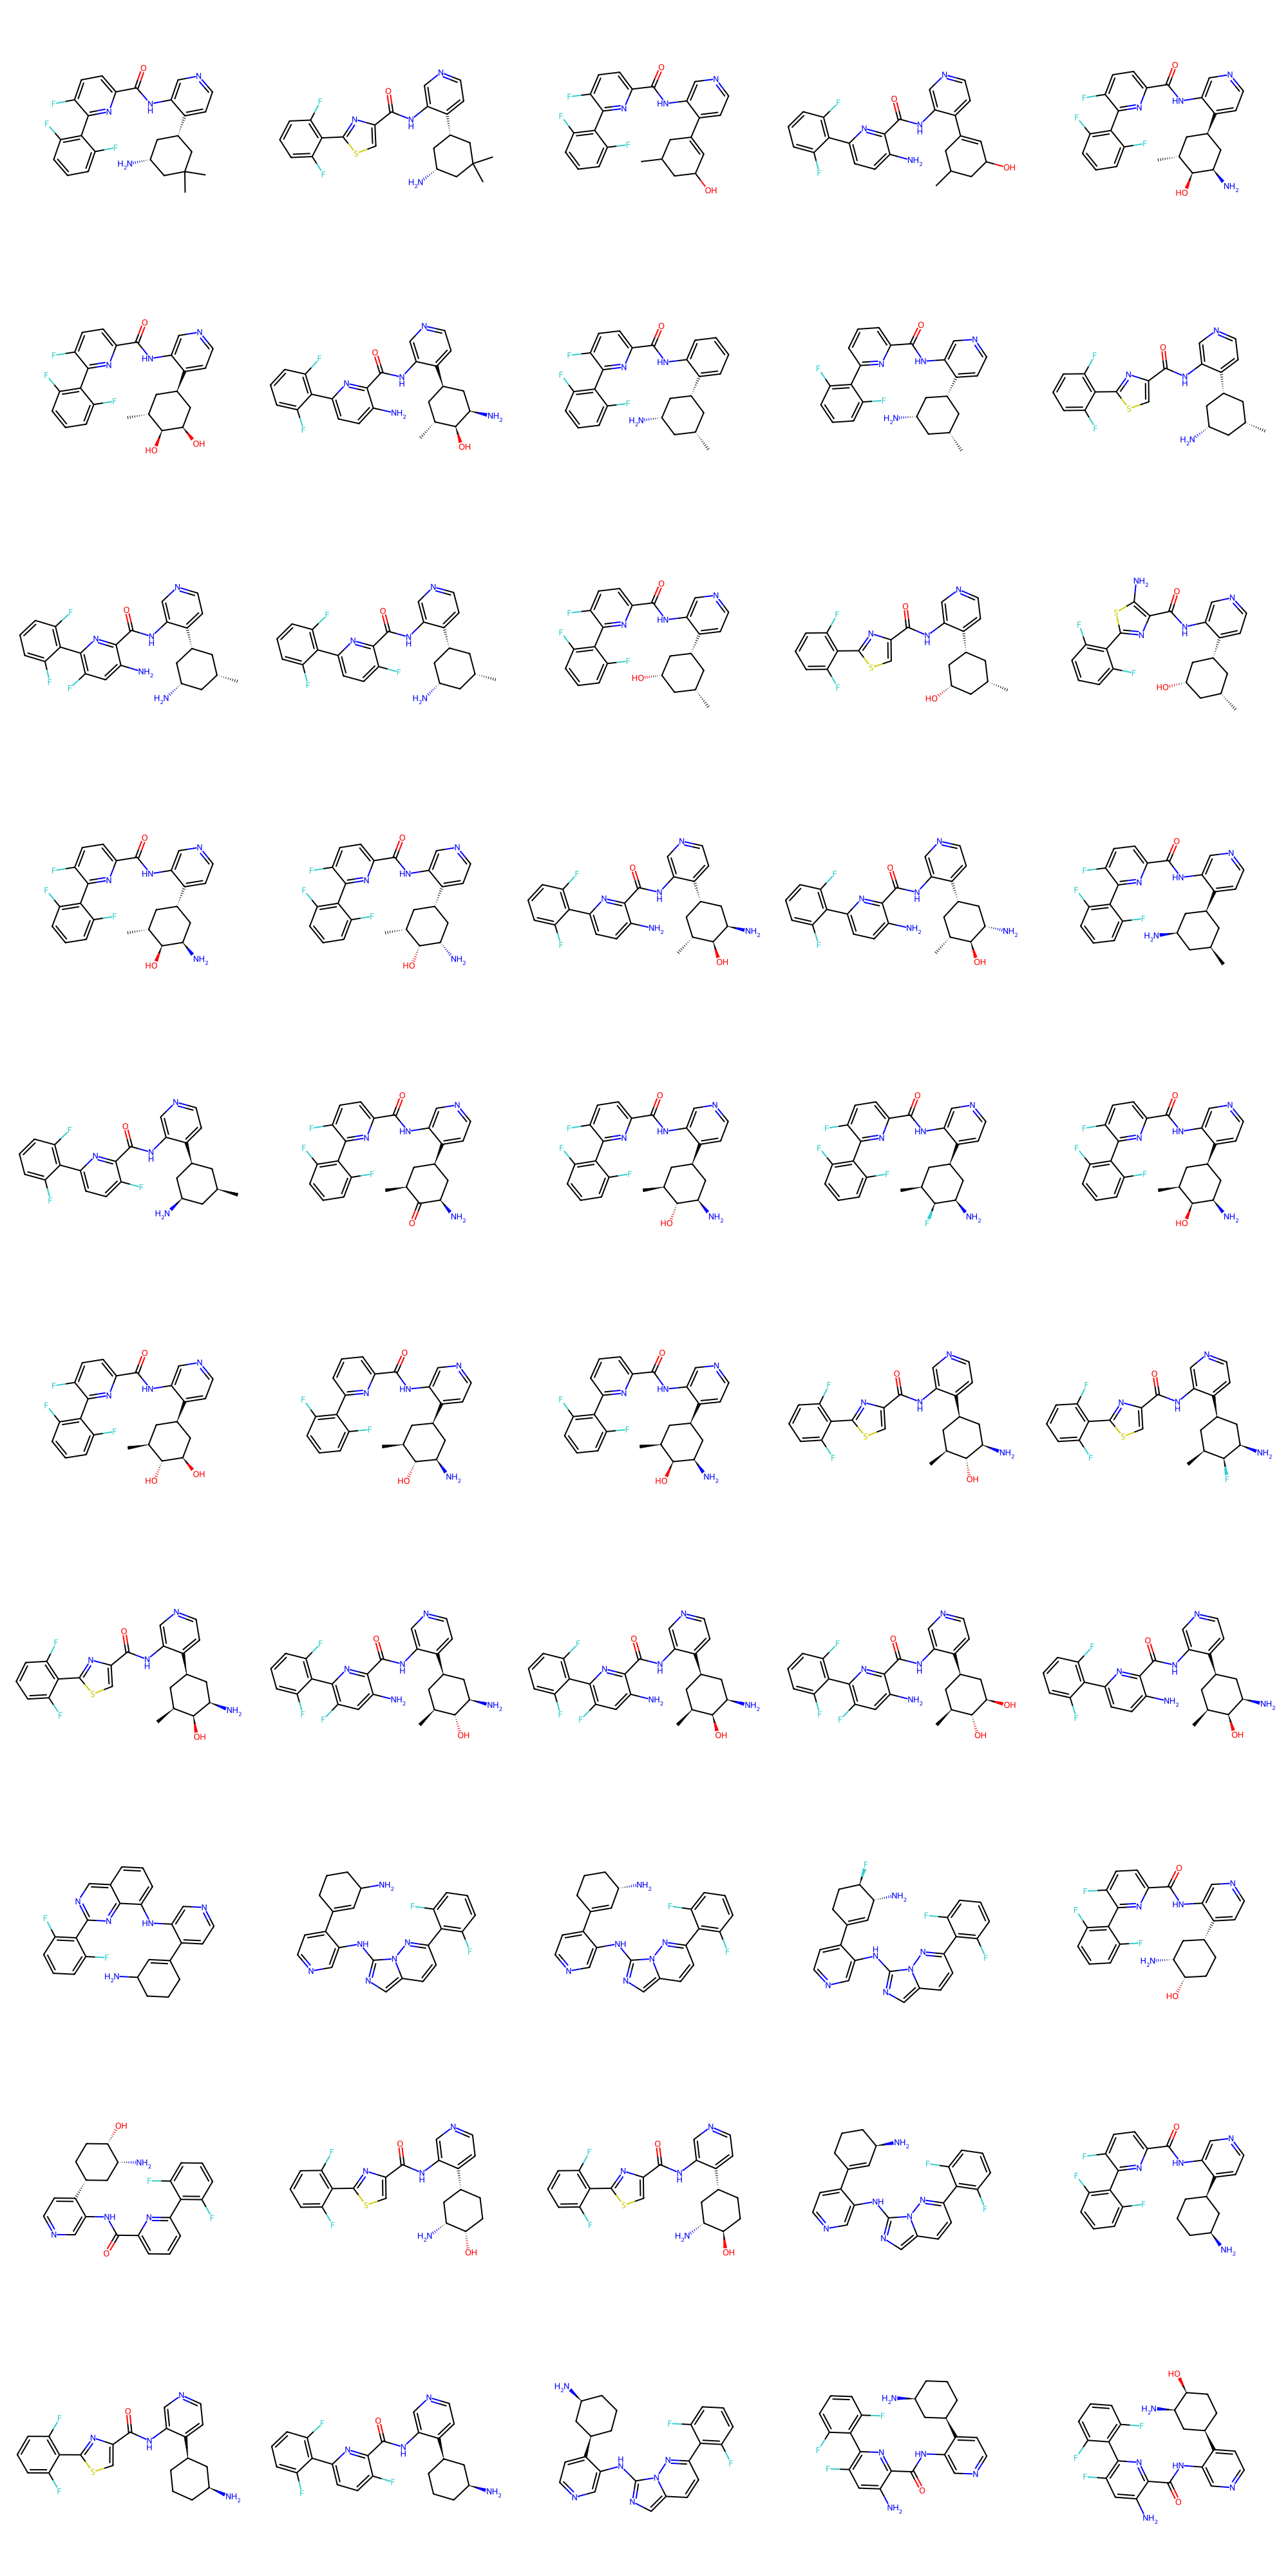

In [20]:
# looks good :)
Draw.MolsToGridImage([Chem.MolFromSmiles(SMI) for SMI in results[results.scaffold_success == 1.0].molecule], molsPerRow=5, subImgSize=(400,400))